# STT: 22
# Họ và tên: Nguyễn Minh Duy
# Lớp: IE224.P11.CNCL
# LAB 03: THỰC HÀNH PHÁT TRIỂN VÀ ĐÁNH GIÁ MÔ HÌNH

Câu 1. Thực hiện phân tích thăm dò tìm ra các biến có khả năng ảnh hưởng nhất đến giá xe.

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./Model_Evaluation_V1.csv")

In [3]:
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495,11.190476,Medium,0,1
1,1,168,toyota,std,two,sedan,rwd,front,94.5,0.810668,...,9.0,70.0,4800.0,29,34,8058,8.103448,Low,0,1
2,1,122,audi,std,four,wagon,fwd,front,105.8,0.925997,...,8.5,110.0,5500.0,19,25,18920,12.368421,Medium,0,1
3,3,150,saab,turbo,two,hatchback,fwd,front,99.1,0.896684,...,9.0,160.0,5500.0,19,26,18150,12.368421,High,0,1
4,1,119,plymouth,turbo,two,hatchback,fwd,front,93.7,0.755887,...,7.6,102.0,5500.0,24,30,7957,9.791667,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0,122,bmw,std,four,sedan,rwd,front,103.5,0.908217,...,8.0,182.0,5400.0,16,22,30760,14.687500,High,0,1
197,0,91,toyota,std,four,hatchback,fwd,front,95.7,0.799135,...,22.5,56.0,4500.0,38,47,7788,6.184211,Low,1,0
198,-2,103,volvo,turbo,four,sedan,rwd,front,104.3,0.907256,...,7.5,162.0,5100.0,17,22,18420,13.823529,High,0,1
199,3,122,porsche,std,two,hardtop,rwd,rear,89.5,0.811629,...,9.5,207.0,5900.0,17,25,34028,13.823529,High,0,1


In [4]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

In [5]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [6]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [14]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])
numeric_data = numeric_data.dropna()

price                1.000000
engine-size          0.887508
curb-weight          0.835073
city-L/100km         0.812647
horsepower           0.810049
width                0.751674
length               0.692043
wheel-base           0.586661
bore                 0.543436
height               0.138907
normalized-losses    0.135552
diesel               0.110347
stroke               0.082310
compression-ratio    0.071079
symboling           -0.084190
peak-rpm            -0.104477
gas                 -0.110347
city-mpg            -0.699738
highway-mpg         -0.714941
Name: price, dtype: float64


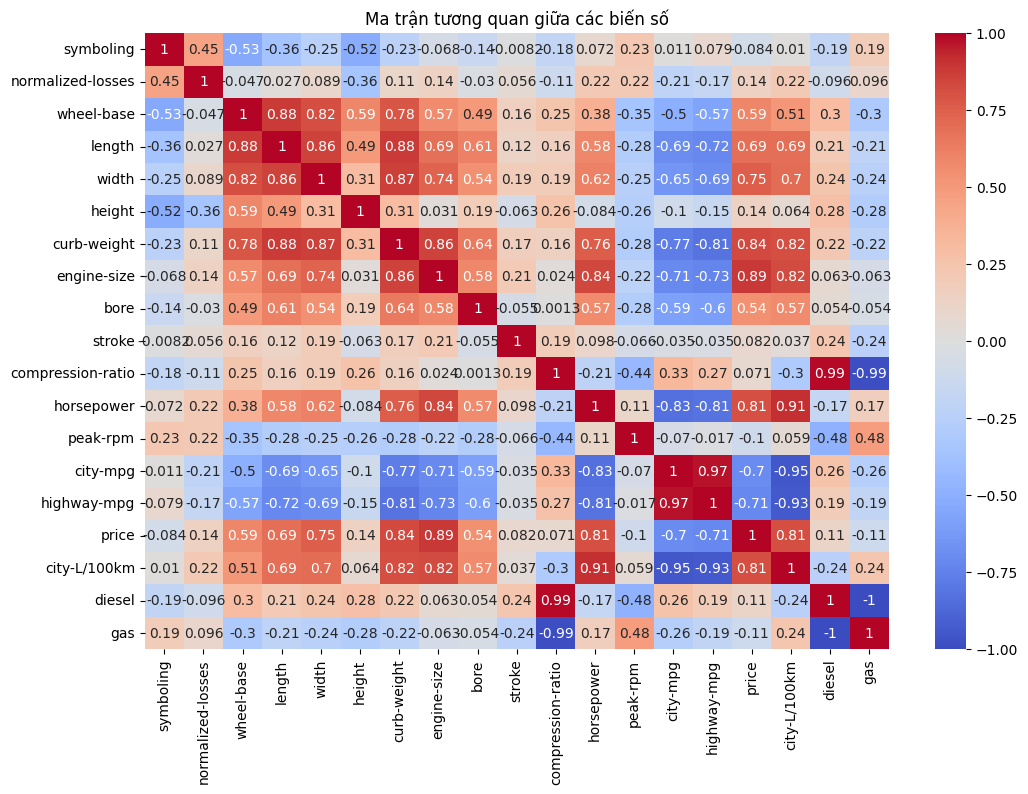

In [17]:
correlation_matrix = numeric_data.corr()
print(correlation_matrix['price'].sort_values(ascending=False))
# Vẽ heatmap để trực quan hóa ma trận tương quan
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Ma trận tương quan giữa các biến số")
plt.show()

Text(0.5, 1.0, 'Mối quan hệ giữa engine-size và price')

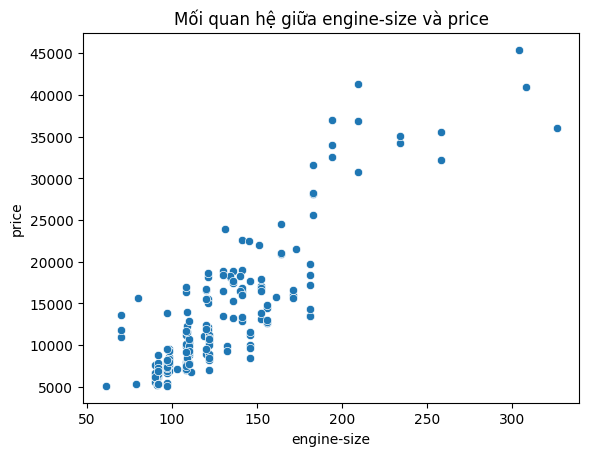

In [37]:
sns.scatterplot(x='engine-size', y='price', data=df)
plt.title("Mối quan hệ giữa engine-size và price")

Text(0.5, 1.0, 'Mối quan hệ giữa highway-mpg và price')

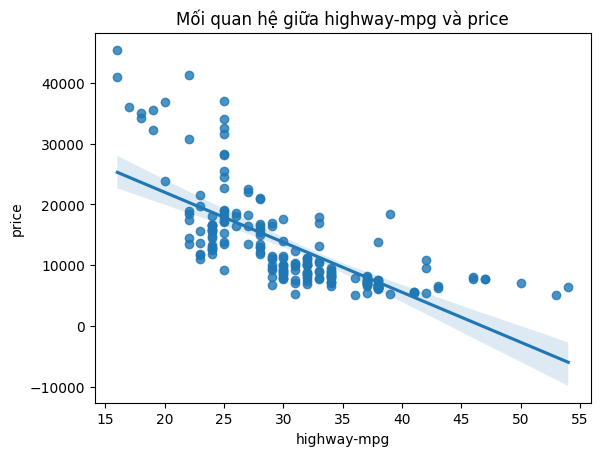

In [39]:
sns.regplot(x="highway-mpg", y="price", data=df)
plt.title("Mối quan hệ giữa highway-mpg và price")

Text(0.5, 1.0, 'Phân phối price theo mã lực')

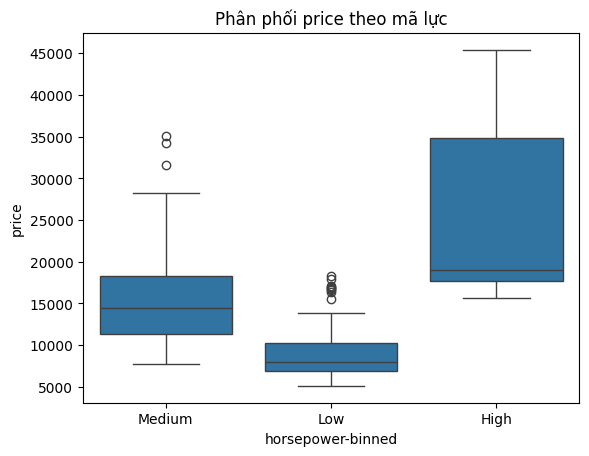

In [43]:
sns.boxplot(x='horsepower-binned', y='price', data=df)
plt.title("Phân phối price theo mã lực")

Câu 2. Chọn các biến kiểu số phù hợp xây dựng mô hình hồi quy tuyến tính đơn và đa biến. Đánh giá các mô hình bằng thang đo đã học.

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [46]:
# Lọc các cột số
numeric_columns = df.select_dtypes(include=['float64', 'int64']).dropna()

In [47]:
# Tính ma trận tương quan và hiển thị tương quan với 'price'
correlation_matrix = numeric_columns.corr()
print("\nTương quan với 'price':")
print(correlation_matrix['price'].sort_values(ascending=False))


Tương quan với 'price':
price                1.000000
engine-size          0.887508
curb-weight          0.835073
city-L/100km         0.812647
horsepower           0.810049
width                0.751674
length               0.692043
wheel-base           0.586661
bore                 0.543436
height               0.138907
normalized-losses    0.135552
diesel               0.110347
stroke               0.082310
compression-ratio    0.071079
symboling           -0.084190
peak-rpm            -0.104477
gas                 -0.110347
city-mpg            -0.699738
highway-mpg         -0.714941
Name: price, dtype: float64


In [48]:
# Chọn các biến có tương quan cao với 'price' (>|0.5|)
selected_features = correlation_matrix['price'][
    (correlation_matrix['price'].abs() > 0.5) & (correlation_matrix['price'] != 1.0)
].index.tolist()

In [49]:
print("\nCác biến được chọn để xây dựng mô hình:")
print(selected_features)


Các biến được chọn để xây dựng mô hình:
['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore', 'horsepower', 'city-mpg', 'highway-mpg', 'city-L/100km']


In [50]:
# Tách dữ liệu
X = numeric_columns[selected_features]
y = numeric_columns['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Hồi quy tuyến tính đơn biến
print("\nHồi quy tuyến tính đơn biến:")
best_single_feature = selected_features[0]  # Biến có tương quan cao nhất
X_train_single = X_train[[best_single_feature]]
X_test_single = X_test[[best_single_feature]]

single_model = LinearRegression()
single_model.fit(X_train_single, y_train)

y_pred_single = single_model.predict(X_test_single)
r2_single = r2_score(y_test, y_pred_single)
rmse_single = np.sqrt(mean_squared_error(y_test, y_pred_single))

print(f"R² (đơn biến): {r2_single:.3f}")
print(f"RMSE (đơn biến): {rmse_single:.3f}")


Hồi quy tuyến tính đơn biến:
R² (đơn biến): 0.280
RMSE (đơn biến): 5748.742


In [53]:
# Hồi quy tuyến tính đa biến
print("\nHồi quy tuyến tính đa biến:")
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

y_pred_multi = multi_model.predict(X_test)
r2_multi = r2_score(y_test, y_pred_multi)
rmse_multi = np.sqrt(mean_squared_error(y_test, y_pred_multi))

print(f"R² (đa biến): {r2_multi:.3f}")
print(f"RMSE (đa biến): {rmse_multi:.3f}")


Hồi quy tuyến tính đa biến:
R² (đa biến): 0.832
RMSE (đa biến): 2778.543


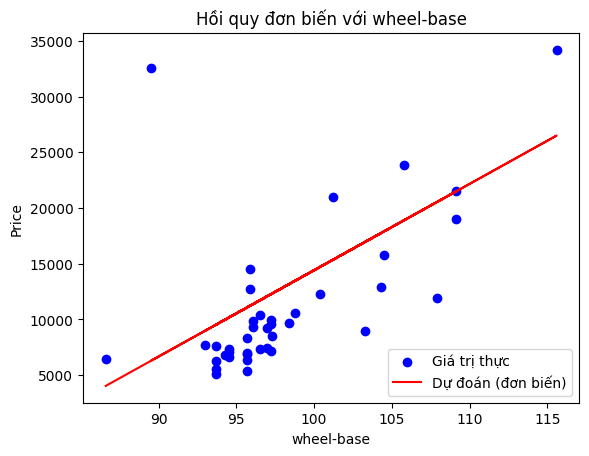

In [54]:
# Trực quan hóa hồi quy đơn biến
plt.scatter(X_test_single, y_test, color='blue', label='Giá trị thực')
plt.plot(X_test_single, y_pred_single, color='red', label='Dự đoán (đơn biến)')
plt.title(f"Hồi quy đơn biến với {best_single_feature}")
plt.xlabel(best_single_feature)
plt.ylabel('Price')
plt.legend()
plt.show()

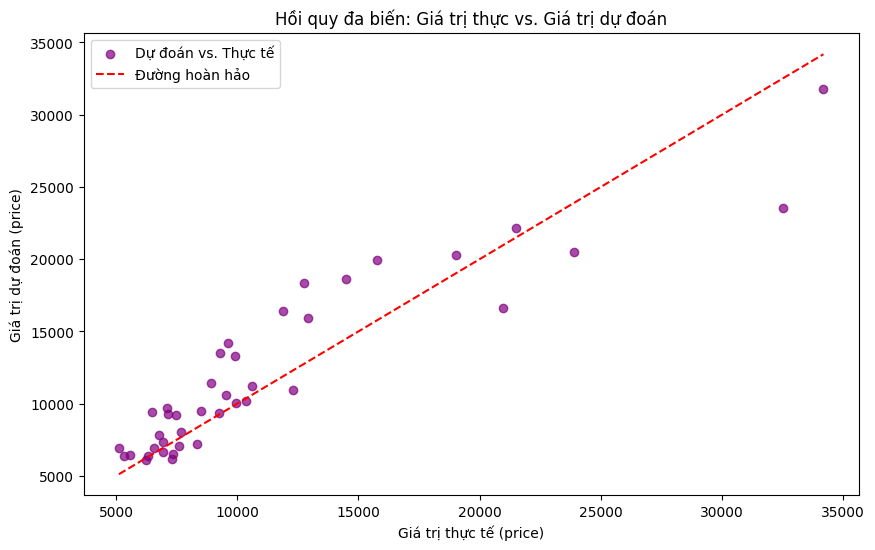

In [55]:
# Trực quan hóa hồi quy đa biến
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_multi, alpha=0.7, color='purple', label='Dự đoán vs. Thực tế')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Đường hoàn hảo')
plt.title("Hồi quy đa biến: Giá trị thực vs. Giá trị dự đoán")
plt.xlabel("Giá trị thực tế (price)")
plt.ylabel("Giá trị dự đoán (price)")
plt.legend()
plt.show()

Câu 3. Chọn các biến kiểu số phù hợp xây dựng mô hình hồi quy đa thức đơn biến.
Đánh giá các mô hình bằng thang đo đã học.

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [58]:
# Lọc các cột số
numeric_columns = df.select_dtypes(include=['float64', 'int64']).dropna()

In [59]:
# Tính ma trận tương quan và chọn biến phù hợp
correlation_matrix = numeric_columns.corr()
print("\nTương quan với 'price':")
print(correlation_matrix['price'].sort_values(ascending=False))


Tương quan với 'price':
price                1.000000
engine-size          0.887508
curb-weight          0.835073
city-L/100km         0.812647
horsepower           0.810049
width                0.751674
length               0.692043
wheel-base           0.586661
bore                 0.543436
height               0.138907
normalized-losses    0.135552
diesel               0.110347
stroke               0.082310
compression-ratio    0.071079
symboling           -0.084190
peak-rpm            -0.104477
gas                 -0.110347
city-mpg            -0.699738
highway-mpg         -0.714941
Name: price, dtype: float64


In [60]:
# Lựa chọn biến có tương quan cao nhất với 'price' (trừ chính 'price')
best_single_feature = correlation_matrix['price'].sort_values(ascending=False).index[1]
print(f"\nBiến được chọn để xây dựng mô hình hồi quy đa thức đơn biến: {best_single_feature}")


Biến được chọn để xây dựng mô hình hồi quy đa thức đơn biến: engine-size


In [61]:
# Tách dữ liệu
X = numeric_columns[[best_single_feature]]
y = numeric_columns['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Hồi quy đa thức bậc 2:
R²: 0.772
RMSE: 3235.394


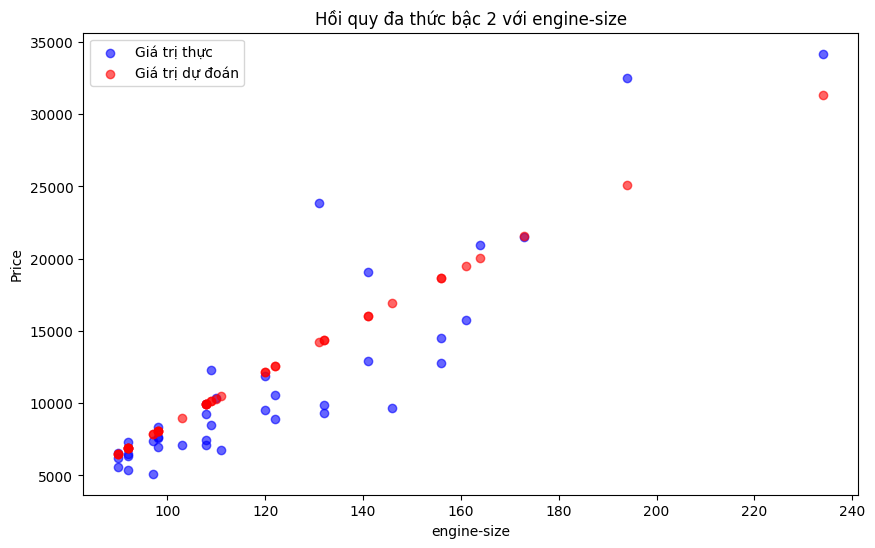


Hồi quy đa thức bậc 3:
R²: 0.796
RMSE: 3063.867


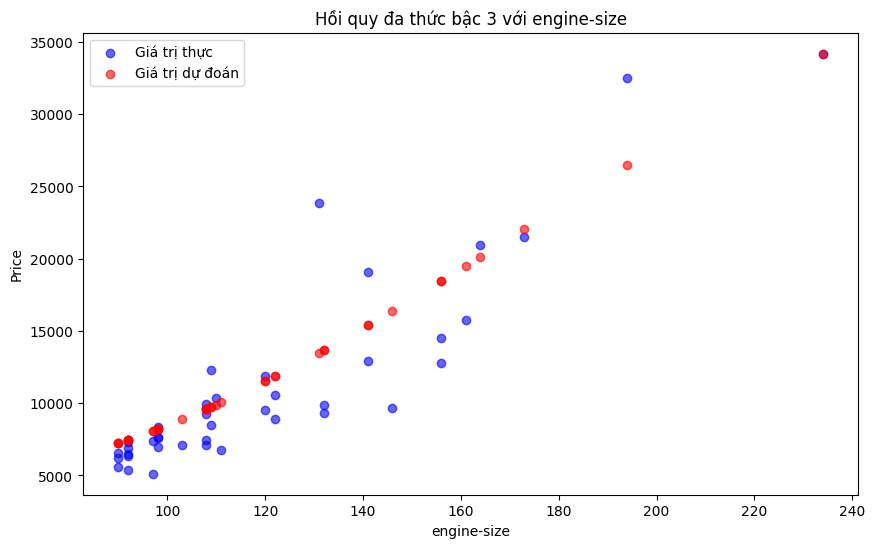


Hồi quy đa thức bậc 4:
R²: 0.796
RMSE: 3061.640


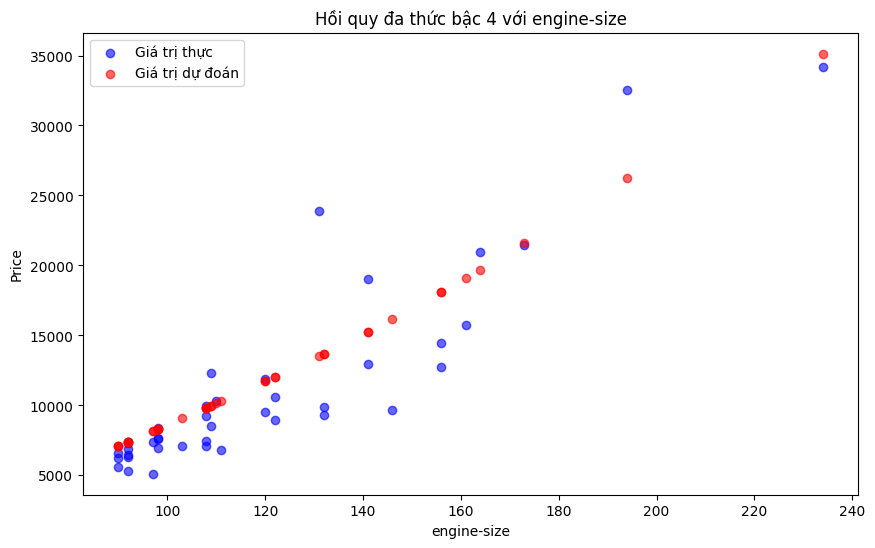

In [62]:
# Thử nghiệm các bậc đa thức
degrees = [2, 3, 4]  # Các bậc đa thức
for degree in degrees:
    print(f"\nHồi quy đa thức bậc {degree}:")

    # Tạo các đặc trưng đa thức
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Huấn luyện mô hình
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

    # Dự đoán
    y_pred = poly_model.predict(X_test_poly)

    # Đánh giá mô hình
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"R²: {r2:.3f}")
    print(f"RMSE: {rmse:.3f}")

    # Trực quan hóa kết quả
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Giá trị thực')
    plt.scatter(X_test, y_pred, color='red', alpha=0.6, label='Giá trị dự đoán')
    plt.title(f"Hồi quy đa thức bậc {degree} với {best_single_feature}")
    plt.xlabel(best_single_feature)
    plt.ylabel('Price')
    plt.legend()
    plt.show()

Câu 4. Chọn các biến kiểu số phù hợp xây dựng mô hình hồi quy đa thức nhiều biến.
Đánh giá các mô hình bằng thang đo đã học.

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [72]:
# Lọc các cột kiểu số
numeric_columns = df.select_dtypes(include=['float64', 'int64']).dropna()

In [73]:
# Tính ma trận tương quan và chọn các biến phù hợp
correlation_matrix = numeric_columns.corr()
print("\nTương quan với 'price':")
print(correlation_matrix['price'].sort_values(ascending=False))


Tương quan với 'price':
price                1.000000
engine-size          0.887508
curb-weight          0.835073
city-L/100km         0.812647
horsepower           0.810049
width                0.751674
length               0.692043
wheel-base           0.586661
bore                 0.543436
height               0.138907
normalized-losses    0.135552
diesel               0.110347
stroke               0.082310
compression-ratio    0.071079
symboling           -0.084190
peak-rpm            -0.104477
gas                 -0.110347
city-mpg            -0.699738
highway-mpg         -0.714941
Name: price, dtype: float64


In [74]:
# Chọn các biến có tương quan cao với 'price' (|tương quan| > 0.5)
selected_features = correlation_matrix['price'][
    (correlation_matrix['price'].abs() > 0.5) & (correlation_matrix['price'] != 1.0)
].index.tolist()

print(f"\nCác biến được chọn để xây dựng mô hình hồi quy đa thức nhiều biến: {selected_features}")


Các biến được chọn để xây dựng mô hình hồi quy đa thức nhiều biến: ['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore', 'horsepower', 'city-mpg', 'highway-mpg', 'city-L/100km']


In [75]:
# Tách dữ liệu
X = numeric_columns[selected_features]
y = numeric_columns['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
# Thử nghiệm các bậc đa thức
degrees = [2, 3, 4]  # Các bậc đa thức để thử nghiệm
for degree in degrees:
    print(f"\nHồi quy đa thức bậc {degree}:")

    # Tạo các đặc trưng đa thức
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Huấn luyện mô hình
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

    # Dự đoán
    y_pred = poly_model.predict(X_test_poly)

    # Đánh giá mô hình
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"R²: {r2:.3f}")
    print(f"RMSE: {rmse:.3f}")


Hồi quy đa thức bậc 2:
R²: 0.521
RMSE: 4688.037

Hồi quy đa thức bậc 3:
R²: -28899.270
RMSE: 1151843.381

Hồi quy đa thức bậc 4:
R²: -129392.164
RMSE: 2437239.158


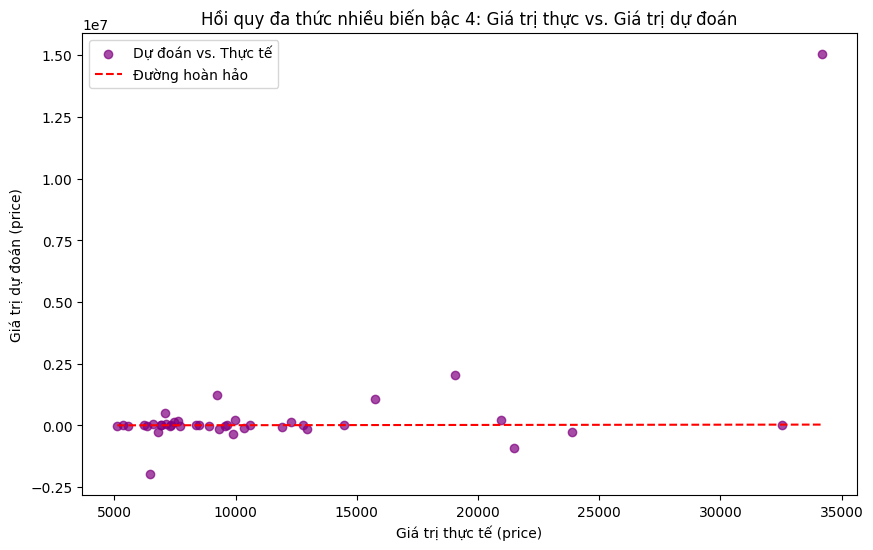

In [78]:
# Trực quan hóa kết quả (Giá trị thực tế vs. Dự đoán cho bậc cao nhất)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='purple', label='Dự đoán vs. Thực tế')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Đường hoàn hảo')
plt.title(f"Hồi quy đa thức nhiều biến bậc {degrees[-1]}: Giá trị thực vs. Giá trị dự đoán")
plt.xlabel("Giá trị thực tế (price)")
plt.ylabel("Giá trị dự đoán (price)")
plt.legend()
plt.show()

Câu 5. Chọn các biến có khả năng ảnh hưởng nhất đến giá xe xây dựng mô hình hồi
quy phù hợp cho bộ dữ liệu để dự đoán giá xe.

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

In [80]:
# Lọc các cột kiểu số và loại bỏ giá trị null
numeric_columns = df.select_dtypes(include=['float64', 'int64']).dropna()

In [81]:
# Tính ma trận tương quan và chọn các biến phù hợp
correlation_matrix = numeric_columns.corr()
print("\nTương quan với 'price':")
print(correlation_matrix['price'].sort_values(ascending=False))

# Lựa chọn các biến có tương quan cao với 'price' (|tương quan| > 0.5)
selected_features = correlation_matrix['price'][
    (correlation_matrix['price'].abs() > 0.5) & (correlation_matrix['price'] != 1.0)
].index.tolist()

print(f"\nCác biến được chọn: {selected_features}")


Tương quan với 'price':
price                1.000000
engine-size          0.887508
curb-weight          0.835073
city-L/100km         0.812647
horsepower           0.810049
width                0.751674
length               0.692043
wheel-base           0.586661
bore                 0.543436
height               0.138907
normalized-losses    0.135552
diesel               0.110347
stroke               0.082310
compression-ratio    0.071079
symboling           -0.084190
peak-rpm            -0.104477
gas                 -0.110347
city-mpg            -0.699738
highway-mpg         -0.714941
Name: price, dtype: float64

Các biến được chọn: ['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore', 'horsepower', 'city-mpg', 'highway-mpg', 'city-L/100km']


In [82]:
# Tách dữ liệu đầu vào (X) và đầu ra (y)
X = numeric_columns[selected_features]
y = numeric_columns['price']

In [85]:
# Chuẩn hóa dữ liệu đầu vào
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [86]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [89]:
# Tạo danh sách các mô hình hồi quy
models = {
    "Linear Regression": LinearRegression(),
    "ElasticNet Regression": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Support Vector Regression": SVR(kernel='rbf', C=100, epsilon=0.1)
}

In [90]:
# Huấn luyện và đánh giá từng mô hình
results = []
for name, model in models.items():
    print(f"\n{name}:")

    # Huấn luyện mô hình
    model.fit(X_train, y_train)

    # Dự đoán
    y_pred = model.predict(X_test)

    # Đánh giá mô hình
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    results.append({
        "Model": name,
        "R²": r2,
        "MSE": mse,
        "RMSE": rmse
    })

    print(f"R²: {r2:.3f}")
    print(f"MSE: {mse:.3f}")
    print(f"RMSE: {rmse:.3f}")


Linear Regression:
R²: 0.832
MSE: 7720300.137
RMSE: 2778.543

ElasticNet Regression:
R²: 0.830
MSE: 7785565.471
RMSE: 2790.263

Support Vector Regression:
R²: 0.304
MSE: 31946815.954
RMSE: 5652.151


In [91]:
# Tổng hợp và hiển thị kết quả của các mô hình
results_df = pd.DataFrame(results)
print("\nKết quả so sánh các mô hình:")
print(results_df)


Kết quả so sánh các mô hình:
                       Model        R²           MSE         RMSE
0          Linear Regression  0.831830  7.720300e+06  2778.542808
1      ElasticNet Regression  0.830408  7.785565e+06  2790.262617
2  Support Vector Regression  0.304107  3.194682e+07  5652.151445


Câu 6. Tìm mô hình khác thích hợp hơn để dự đoán giá xe (nếu có).

In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import numpy as np

In [97]:
# Lọc các cột kiểu số và loại bỏ các giá trị null
numeric_data = df.select_dtypes(include=['float64', 'int64']).dropna()

In [98]:
# Lựa chọn các biến có tương quan cao với giá (price)
if 'price' in numeric_data.columns:
    correlation_matrix = numeric_data.corr()
    selected_features = correlation_matrix['price'][correlation_matrix['price'].abs() > 0.5].index.drop('price')
    print(f"Các biến được chọn: {list(selected_features)}")

    # Tách dữ liệu
    X = numeric_data[selected_features]
    y = numeric_data['price']

    # Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Chia dữ liệu thành tập huấn luyện và kiểm tra
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Tạo danh sách các mô hình để thử nghiệm
    models = {
        "XGBoost": XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1),
        "LightGBM": LGBMRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
    }

    # Huấn luyện và đánh giá từng mô hình
    results = []
    for name, model in models.items():
        print(f"\n{name}:")

        # Huấn luyện mô hình
        model.fit(X_train, y_train)

        # Dự đoán
        y_pred = model.predict(X_test)

        # Đánh giá mô hình
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        results.append({
            "Model": name,
            "R²": r2,
            "MSE": mse,
            "RMSE": rmse
        })

        print(f"R²: {r2:.3f}")
        print(f"MSE: {mse:.3f}")
        print(f"RMSE: {rmse:.3f}")

    # Tổng hợp và hiển thị kết quả
    results_df = pd.DataFrame(results)
    print("\nKết quả so sánh các mô hình:")
    print(results_df)

    # Tối ưu hóa tham số cho XGBoost
    print("\nTối ưu hóa tham số cho XGBoost:")
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1, 0.2]
    }
    grid_search = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)

    print(f"Best Parameters for XGBoost: {grid_search.best_params_}")
    best_model = grid_search.best_estimator_
    y_pred_best = best_model.predict(X_test)
    r2_best = r2_score(y_test, y_pred_best)
    print(f"Optimized XGBoost R²: {r2_best:.3f}")

else:
    print("Cột 'price' không tồn tại trong dữ liệu.")

Các biến được chọn: ['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore', 'horsepower', 'city-mpg', 'highway-mpg', 'city-L/100km']

XGBoost:
R²: 0.935
MSE: 2976606.211
RMSE: 1725.284

LightGBM:
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000122 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 285
[LightGBM] [Info] Number of data points in the train set: 157, number of used features: 10
[LightGBM] [Info] Start training from score 13707.757962
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

Câu 7. *Câu mở rộng (GV hướng dẫn trực tiếp trên lớp): Xây dựng công thức dự đoán giá xe với đầu vào là số lượng biến bất kỳ (1 biến, 2 biến, 5 biến...)